<a href="https://colab.research.google.com/github/gauris26/Machine-Learning/blob/main/Real_State_Price_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Relacion de precio de propiedades con estaciones de metros y tiendas mas cercanas**

Partiendo del análisis exploratorio del data set permite inferir el comportamiento de los precios de la viviendo por unidad de área, dependiendo de algunos factores como la cantidad de tiendas de conveniencias (markets) o la distancia de la estación del Metro más cercana.

Adjunto dataset utilizado: https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction/discussion/459132

Autor: Gauris javier
garu.gauris@gmail.com

## Analisis Exploratorio

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Real estate.csv', delimiter=',')

In [ ]:
df.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [ ]:
df.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [ ]:
df.isnull()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
409,False,False,False,False,False,False,False,False
410,False,False,False,False,False,False,False,False
411,False,False,False,False,False,False,False,False
412,False,False,False,False,False,False,False,False


## Determinar correlacion entre los datos

In [ ]:
corrmat = df.corr(numeric_only =True)

In [ ]:
corrmat

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<Axes: >

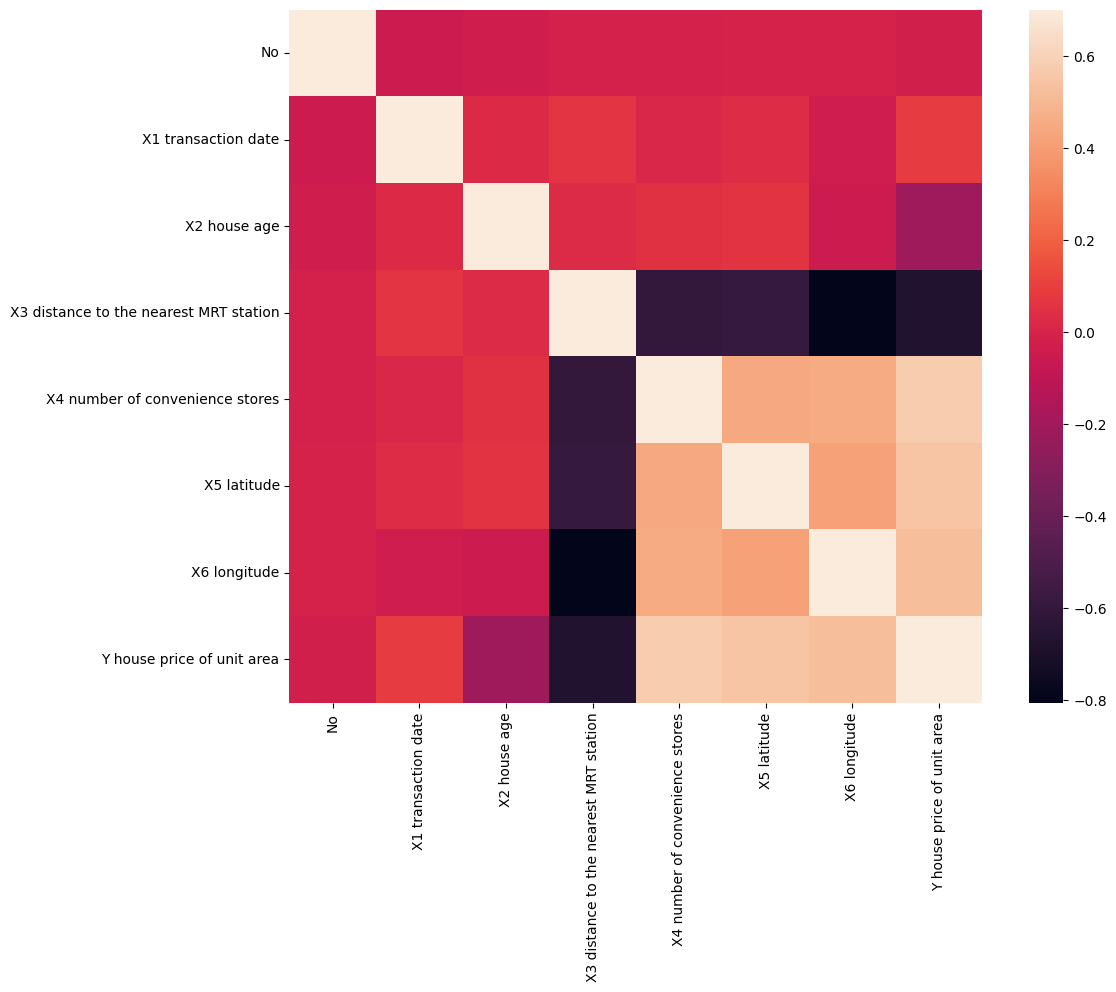

In [ ]:
#Genear Heatmap para visualizar las correlaciones visualmente
f, ax=plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.7, square=True)

In [ ]:
#Determino cuales columnas tienen mayor correccion con el precio por unidad de area
cols = corrmat.nlargest(7, 'Y house price of unit area')['Y house price of unit area'].index

In [ ]:
df[cols].head(5)

,Y house price of unit area,X4 number of convenience stores,X5 latitude,X6 longitude,X1 transaction date,No,X2 house age
0,37.9,10,24.98298,121.54024,2012.917,1,32.0
1,42.2,9,24.98034,121.53951,2012.917,2,19.5
2,47.3,5,24.98746,121.54391,2013.583,3,13.3
3,54.8,5,24.98746,121.54391,2013.500,4,13.3
4,43.1,5,24.97937,121.54245,2012.833,5,5.0


## Generar modelo

In [ ]:
var_number_stores_x1 = 'X4 number of convenience stores'
var_distance_to_the_nearest_MRT_station_x2 = 'X3 distance to the nearest MRT station'
variables_Xs = [var_number_stores_x1, var_distance_to_the_nearest_MRT_station_x2]
variable_Ys = 'Y house price of unit area'

X = df[variables_Xs]
Y = df[variable_Ys]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=0)

In [ ]:
x_train.shape

(82, 2)

In [ ]:
x_test.shape

(332, 2)

In [ ]:
modelo = LinearRegression()

#Entrenar el modelo
modelo.fit(df[variables_Xs], df[variable_Ys])
prediccion = modelo.predict(x_test)
print (f'Coeficientes: {modelo.coef_}')

print(f'Coeficiente de Determinación -> {round(r2_score(y_test, prediccion), 2)*100}%')
#Representa la diferencia entre el estimador y lo que se estima
print(f'Error cuadrático Medio -> {round(mean_squared_error(y_test, prediccion), 2)}')

Coeficientes: [ 1.19759904 -0.00557801]
Coeficiente de Determinación -> 49.0%
Error cuadrático Medio -> 95.17


## Graficar modelo

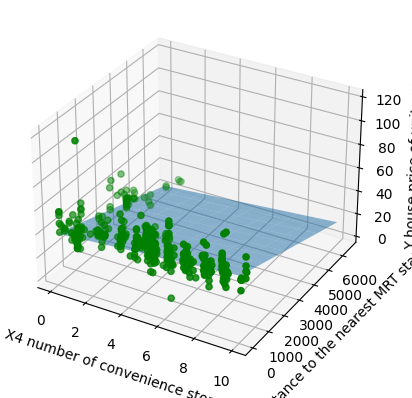

In [ ]:
# Grafica 3D con los datos generados
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[var_number_stores_x1], df[var_distance_to_the_nearest_MRT_station_x2], df[variable_Ys], color='green')

#Determinar axis
axis_x = np.linspace(df[var_number_stores_x1].min(), df[var_number_stores_x1].max(), num=10)
axis_y = np.linspace(df[var_distance_to_the_nearest_MRT_station_x2].min(), df[var_distance_to_the_nearest_MRT_station_x2].max(), num=10)
axis_x, axis_y = np.meshgrid(axis_x, axis_y)
axis_z = modelo.intercept_ + modelo.coef_[0] * axis_x + modelo.coef_[1] * axis_y

# Graficar el plano 3D
ax.plot_surface(axis_x, axis_y, axis_z, alpha=0.5)
ax.set_xlabel(var_number_stores_x1)
ax.set_ylabel(var_distance_to_the_nearest_MRT_station_x2)
ax.set_zlabel(variable_Ys)
plt.show()

## Predicciones

### Comportamiento manteniendo la cantidad de las tiendas fija, y la distancia del metro variable

In [ ]:
cantidad_de_tiendas_de_conveniencia = 5

In [ ]:
distancia_tienda_del_metro_mas_cerca = 125

pred_dict = {
    var_number_stores_x1: [cantidad_de_tiendas_de_conveniencia],
    var_distance_to_the_nearest_MRT_station_x2: [distancia_tienda_del_metro_mas_cerca]
}

prediccion_nueva = pd.DataFrame(pred_dict)
prediccion = round(modelo.predict(prediccion_nueva)[0], 2)

print(f'El costo de por unidad de area para un vivienda con {cantidad_de_tiendas_de_conveniencia} tiendas de conveniencia cerca y con una distancia de {distancia_tienda_del_metro_mas_cerca} [metros/pies] de la estacion del metro mas cercana seria de {prediccion}')

El costo de por unidad de area para un vivienda con 5 tiendas de conveniencia cerca y con una distancia de 125 [metros/pies] de la estacion del metro mas cercana seria de 44.41


In [ ]:
distancia_tienda_del_metro_mas_cerca = 500

prediccion_nueva = pd.DataFrame({
    var_number_stores_x1: [cantidad_de_tiendas_de_conveniencia],
    var_distance_to_the_nearest_MRT_station_x2: [distancia_tienda_del_metro_mas_cerca]
})
prediccion = round(modelo.predict(prediccion_nueva)[0], 2)

print(f'El costo de por unidad de area para un vivienda con {cantidad_de_tiendas_de_conveniencia} tiendas de conveniencia cerca y con una distancia de {distancia_tienda_del_metro_mas_cerca} [metros/pies] de la estacion del metro mas cercana seria de {prediccion}')

El costo de por unidad de area para un vivienda con 5 tiendas de conveniencia cerca y con una distancia de 500 [metros/pies] de la estacion del metro mas cercana seria de 42.32


### Comportamiento manteniendo la distancia metro fija, y la distancia de las tiendas variable

In [ ]:
distancia_tienda_del_metro_mas_cerca = 100

In [ ]:
cantidad_de_tiendas_de_conveniencia = 3

prediccion_nueva = pd.DataFrame({
    var_number_stores_x1: [cantidad_de_tiendas_de_conveniencia],
    var_distance_to_the_nearest_MRT_station_x2: [distancia_tienda_del_metro_mas_cerca]
})
prediccion = round(modelo.predict(prediccion_nueva)[0], 2)

print(f'El costo de por unidad de area para un vivienda con {cantidad_de_tiendas_de_conveniencia} tiendas de conveniencia cerca y con una distancia de {distancia_tienda_del_metro_mas_cerca} [metros/pies] de la estacion del metro mas cercana seria de {prediccion}')

El costo de por unidad de area para un vivienda con 3 tiendas de conveniencia cerca y con una distancia de 100 [metros/pies] de la estacion del metro mas cercana seria de 42.16


In [ ]:
cantidad_de_tiendas_de_conveniencia = 6

prediccion_nueva = pd.DataFrame({
    var_number_stores_x1: [cantidad_de_tiendas_de_conveniencia],
    var_distance_to_the_nearest_MRT_station_x2: [distancia_tienda_del_metro_mas_cerca]
})
prediccion = round(modelo.predict(prediccion_nueva)[0], 2)

print(f'El costo de por unidad de area para un vivienda con {cantidad_de_tiendas_de_conveniencia} tiendas de conveniencia cerca y con una distancia de {distancia_tienda_del_metro_mas_cerca} [metros/pies] de la estacion del metro mas cercana seria de {prediccion}')

El costo de por unidad de area para un vivienda con 6 tiendas de conveniencia cerca y con una distancia de 100 [metros/pies] de la estacion del metro mas cercana seria de 45.75


### Resultados

Basandos en los datos podemos como hay un relacion directamenta proporcional con la cantidad de tiendas de conveniencias y un relacion inversamente proporcional la distancia mas cerca al metro:

**Directamente proporcional**: Entre mas tiendas de conveniencia hay mayor es el precio por unidad de medida [metros/pies].

**Inversamente proporcional**: Entre menor es la distancia con la estacion del metro mas cerca mayor es el precio.